In [1]:
import re, sys, os
import numpy as np
sys.path.append("./bin")
import matplotlib.pyplot as plt
from functools import partial
import pandas as pd
from matplotlib import colors
import matplotlib
import twoconf_x_P_higherac

In [2]:
instance=twoconf_x_P_higherac.GRFCalculations_100_100_15()
othervars=np.array([0])

In [3]:
#Cycle conditions- do not execute this cell
#closed conf
ax_0_0*aP_x_0*bx_xP_0*bP_P_0=aP_0_0*ax_P_0*bP_xP_0*bx_x_0
#if cooperativity affects unbinding only
ax_0_0*aP_0_0*bx_x_0/w1*bP_P_0=aP_0_0*ax_0_0*bP_P_0/w1*bx_x_0


#open conf
ax_0_1*aP_x_1*bx_xP_1*bP_P_1=aP_0_1*ax_P_1*bP_xP_1*bx_x_1 
#if cooperativity affects unbinding only
ax_0_1*aP_0_1*bx_x_1/w2*bP_P_1=aP_0_1*ax_0_1*bP_P_1/w2*bx_x_1 


#horizontal 1
kopen0*ax_0_1*kclosex*bx_x_0=ax_x_0*kopenx*bx_x_1*kclose0
#in terms of basal and closed
kopen0*konx*ax*alpha_c*kclose0*bx=ax*alpha*kopen0*kbx*bx*kclose0
konx*alpha_c=alpha*kbx
konx*alpha_c/(kbx*alpha)=1. If alpha=1: alpha_c=kbx/konx
    
#horizontal 2
kopen0*aP_0_1*kcloseP*bP_P_0=aP_P_0*kopenP*bP_P_1*kclose0
#in terms of basal and closed
kopen0*aP*konP*kclose0*beta*bP=aP*kopen0*beta_o*bP*beta*kclose0
konP=beta_o to maintain detailed balance. 

#horizontal 3
alpha*kopen0*aP_x_1*kclosexP*bP_xP_0=aP_x_0*alpha2*kopen0*bP_xP_1*alpha_c*kclose0
alpha*aP_x_1*kclosexP*bP_xP_0=aP_x_0*alpha2*bP_xP_1*kclosex

#horizontal 4
kopen0*beta_o*ax_P_1*kclosexP*bx_xP_0=ax_P_0*alpha2*kopen0*bx_xP_1*kclose0*beta
beta_o*ax_P_1*kclosexP*bx_xP_0=ax_P_0*alpha2*bx_xP_1*kclose0*beta


#Note that imposing detailed balance on the cycles involves many constraints




SyntaxError: invalid syntax (<ipython-input-3-758a45f58f1e>, line 19)

In [3]:
def getparset(pars):
    ax_0_0,bx_x_0,aP_0_0,bP_P_0,kopen0,kclose0,alpha,beta,gamma,w,kbx=pars
    
    ax_P_0=ax_0_0
    bx_xP_0=bx_x_0/w
    
    aP_x_0=aP_0_0
    bP_xP_0=bP_P_0/w
    
    
    ax_0_1=ax_0_0 #G on rate is the same in both conformations
    bx_x_1=bx_x_0*kbx
    aP_0_1=aP_0_0 #P on rate is the same
    bP_P_1=bP_P_0*beta #<1 #off-rate changes
    
    
    aP_x_1=aP_0_1
    bP_xP_1=bP_P_1/(w*gamma)
    
    ax_P_1=ax_0_1
    bx_xP_1=bx_x_1/(w*gamma)


    kopenx=alpha*kopen0 #>1
    kclosex=kclose0
    kopenP=kopen0
    kcloseP=kclose0*beta #<1
    kopenxP=kopenx
    #deltaG=kcloseG-kclose0
    #deltaP=kcloseP-kclose0
    kclosexP=kclose0*beta/gamma


    parset=[ax_0_0,ax_0_1,bx_x_0,bx_x_1,aP_0_0,aP_0_1,bP_P_0,bP_P_1,aP_x_0,aP_x_1,bP_xP_0,bP_xP_1,ax_P_0,ax_P_1,bx_xP_0,bx_xP_1,kopen0,kclose0,kopenx,kclosex,kopenP,kcloseP,kopenxP,kclosexP]
    return parset


def plot_parset(pars,qs,title=None,widerange=False,color="k",text=None,figname=None, xrange=None, xticks=None):
    if xrange:
        xvals=np.logspace(xrange[0],xrange[1],100)
    else:
        xvals=np.logspace(-1.,1.,200)
    
    values=np.zeros(len(xvals))
    #accessibilities=np.zeros(len(xvals))
    xval=0
    parset=getparset(pars)
    parset=np.concatenate((parset,qs))
    print(parset)
    instance.fill_num_den(parset,othervars)
    expr0=instance.interfaceGRF(xval)
    print("expr0", expr0)
   

    for x_,xval in enumerate(xvals):
        expr=instance.interfaceGRF(xval)
        
        values[x_]=expr/expr0
        #accessibilities[x_]=acc/acc0
    fig,ax=plt.subplots(1,1,figsize=(1.8,1.35))
    ax.plot(xvals,values,color=color,linewidth=2)
    ax.set_xscale('log')
    ax.set_xlabel(r"x",size=14)
    ax.set_ylabel('F(x)',size=14)
    ax.axhline(y=1,linestyle="--",color="gray")
    ax.spines[['right', 'top']].set_visible(False)
    if xticks:
        ax.set_xticks(xticks)
        ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())


    if title is not None:
        ax.set_title(title)
    if text is not None:
        ax.text(0.8,0.8,text,transform=ax.transAxes)
    #plt.tight_layout()
    if figname is not None:
        plt.savefig(figname,bbox_inches="tight")
    plt.show()
    
def plot_parset_bx(pars,qs,xval,title=None,color="k",text=None,figname=None,bTrange=None):
    
    if bTrange:
        bxvals=np.logspace(bTrange[0],bTrange[1],200)
    else:
        bxvals=np.logspace(-1,1,200)
    values=np.zeros(len(bxvals))
    
    
    #acc0=np.sum(Ps[4:])

    for x_,bxval in enumerate(bxvals):
        pars2=pars.copy()
        pars2[1]=bxval
        parset=getparset(pars2)
        parset=np.concatenate((parset,qs))
        instance.fill_num_den(parset,othervars)
        expr=instance.interfaceGRF(xval)
        expr0=instance.interfaceGRF(0)
        values[x_]=expr/expr0
    fig,ax=plt.subplots(1,1,figsize=(1.8,1.35))
    ax.plot(bxvals,values,color=color,linewidth=2)
    ax.set_xscale('log')
    ax.set_xlabel(r"$b_T$",size=14)
    #ax.set_ylabel('fold change ($F(x)$)',size=14)
    ax.axhline(y=1,linestyle="--",color="gray")
    ax.spines[['right', 'top']].set_visible(False)

    if title is not None:
        ax.set_title(title)
    if text is not None:
        ax.text(0.15,0.8,text,transform=ax.transAxes)
    #plt.tight_layout()
    if figname is not None:
        plt.savefig(figname,bbox_inches="tight")
    plt.show()

In [4]:
figsfolder="./figscode"

In [5]:
kbx=1 #we consider x doesn't change binding in closed/open
ax=0.1
bx=1
aP_0_0=0.1
bP_P_0=100
kopen0=0.01
kclose0=0.5
beta=0.02
gamma=1

[1.e-01 1.e-01 1.e+00 1.e+00 1.e-01 1.e-01 1.e+02 2.e+00 1.e-01 1.e-01
 1.e+01 2.e-01 1.e-01 1.e-01 1.e-01 1.e-01 1.e-02 5.e-01 5.e-02 5.e-01
 1.e-02 1.e-02 5.e-02 1.e-02 1.e+00 1.e+00 1.e+00 1.e+00]
expr0 0.0019569471624266157


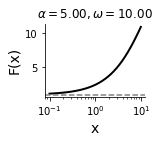

In [6]:
#Activation or repression as a function of alpha and w

#Activation
alpha=5
w=10

pars=np.array([ax,bx,aP_0_0,bP_P_0,kopen0,kclose0,alpha,beta,gamma,w,kbx])
qs=[1,1,1,1]
title=r"$\alpha=%2.2f,\omega=%2.2f$"%(alpha,w)
plot_parset(pars,qs,title=title,figname=os.path.join(figsfolder,"fig3Bup.pdf"))
#plot_parset(pars,qs,title=title,figname=None)

[1.e-01 1.e-01 1.e+00 1.e+00 1.e-01 1.e-01 1.e+02 2.e+00 1.e-01 1.e-01
 1.e+04 2.e+02 1.e-01 1.e-01 1.e+02 1.e+02 1.e-02 5.e-01 5.e-03 5.e-01
 1.e-02 1.e-02 5.e-03 1.e-02 1.e+00 1.e+00 1.e+00 1.e+00]
expr0 0.0019569471624266144


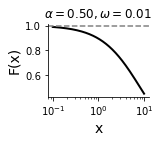

[1.e-01 1.e-01 1.e+00 1.e+00 1.e-01 1.e-01 1.e+02 2.e+00 1.e-01 1.e-01
 1.e+03 2.e+01 1.e-01 1.e-01 1.e+01 1.e+01 1.e-02 5.e-01 5.e-02 5.e-01
 1.e-02 1.e-02 5.e-02 1.e-02 1.e+00 1.e+00 1.e+00 1.e+00]
expr0 0.001956947162426616


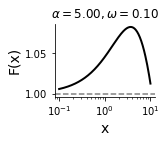

In [7]:
#Repression
alpha=0.5
w=1/100
pars=np.array([ax,bx,aP_0_0,bP_P_0,kopen0,kclose0,alpha,beta,gamma,w,kbx])
qs=[1,1,1,1]
title=r"$\alpha=%2.2f,\omega=%2.2f$"%(alpha,w)
#plot_parset(pars,qs,title=title,figname=os.path.join(figsfolder,"fig3Bdown.pdf"))
plot_parset(pars,qs,title=title,figname=None)
#Nonmonotonic
alpha=5
w=1/10
pars=np.array([ax,bx,aP_0_0,bP_P_0,kopen0,kclose0,alpha,beta,gamma,w,kbx])
title=r"$\alpha=%2.2f,\omega=%2.2f$"%(alpha,w)
#plot_parset(pars,qs,title=title)
plot_parset(pars,qs,title=title,figname=None)

In [8]:
kbx=1 #we consider x doesn't change binding in closed/open
ax=0.025
bx=1
aP_0_0=0.01
bP_P_0=100
kopen0=0.01
kclose0=0.25
beta=0.01
gamma=1

alpha=50
w=0.025

$\alpha=50.00,\omega=0.03$


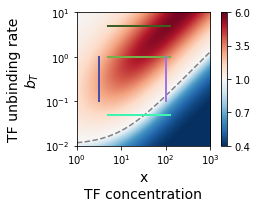

In [9]:
xvals=np.logspace(0,3,200)
bxvals=np.logspace(-2,1,200)
out=np.zeros((len(bxvals), len(xvals)))
qs=[1,1,1,1]
for b, bx in enumerate(bxvals):
    pars=np.array([ax,bx,aP_0_0,bP_P_0,kopen0,kclose0,alpha,beta,gamma,w,kbx])
    
    xval=0
    parset=getparset(pars)
    parset=np.concatenate((parset,qs))
    instance.fill_num_den(parset,othervars)
    expr0=instance.interfaceGRF(xval)
    #acc0=np.sum(Ps[4:])

    for x_,xval in enumerate(xvals):
        expr=instance.interfaceGRF(xval)
        out[b,x_]=expr/expr0
        

bxlist=[0.05,1,5]
xlplot=[np.log10(5),np.log10(125)]
bTlplot=[-1,0]
xlist=[0.5,2]
colors_bx=["#3d6020ff","#75b04aff","#3df4b3ff"][::-1]
fig,axplt=plt.subplots(1,1,figsize=(4,3)) 
#ar=np.ma.masked_array(out,mask=out<1)
min_val_rounded=np.round(out.min(),1) #round minimum value to 1 decimal
max_val_rounded=np.round(out.max(),0) #round max value to 0 decimals
norm=colors.TwoSlopeNorm(vmin=min_val_rounded, vcenter=1., vmax=max_val_rounded)
extent=[np.log10(xvals[0]),np.log10(xvals[-1]),np.log10(bxvals[0]),np.log10(bxvals[-1])]
im=axplt.imshow(out,origin="lower",norm=norm,cmap=plt.cm.RdBu_r,extent=extent)
axplt.contour(out,extent=extent,levels=[1],linestyles=["--"],colors=["gray"])
for b_,bx in enumerate(bxlist):
#    print(bx)
    axplt.plot(xlplot,[np.log10(bx),np.log10(bx)],linestyle="-",color=colors_bx[b_],linewidth=2.)

axplt.plot([xlist[0],xlist[0]],bTlplot,linestyle="-",color="#484eadff",linewidth=2.)
axplt.plot([xlist[1],xlist[1]], bTlplot,linestyle="-",color="#a474e5ff",linewidth=2.)
    #ax.axhline(y=np.log10(bG),)
#ax.set_xscale('log')
axplt.set_xticks([0,1,2,3])
axplt.set_xticklabels([r"$10^0$",r"$10^1$",r"$10^2$",r"$10^3$"])
axplt.set_yticks([-2,-1,0,1])
axplt.set_yticklabels([r"$10^{-2}$",r"$10^{-1}$",r"$10^0$",r"$10^1$"])
axplt.set_ylabel("TF unbinding rate\n"+r"$b_T$",size=14)
axplt.set_xlabel("x"+"\nTF concentration",size=14)
title=r"$\alpha=%2.2f,\omega=%2.2f$"%(alpha,w)
print(title)
#axplt.set_title(title)
below_one=np.linspace(min_val_rounded,1,3)
above_one=np.linspace(1,max_val_rounded,3)
bounds=np.concatenate((below_one,above_one[1:]))
plt.colorbar(im,ax=axplt,ticks=bounds)
#ax.axhline(y=1,linestyle="--",color="gray")
#if title is not None:
#    ax.set_title(title)
#plt.savefig("cmaptest.pdf",bbox_inches="tight")
plt.tight_layout()
plt.savefig(os.path.join(figsfolder,"fig3C_cmap.svg"),bbox_inches="tight")
plt.show()

In [10]:
0.27/60

0.0045000000000000005

$b_x=0.05$
[2.5e-02 2.5e-02 5.0e-02 5.0e-02 1.0e-02 1.0e-02 1.0e+02 1.0e+00 1.0e-02
 1.0e-02 4.0e+03 4.0e+01 2.5e-02 2.5e-02 2.0e+00 2.0e+00 1.0e-02 2.5e-01
 5.0e-01 2.5e-01 1.0e-02 2.5e-03 5.0e-01 2.5e-03 1.0e+00 1.0e+00 1.0e+00
 1.0e+00]
expr0 0.0004805382027871216


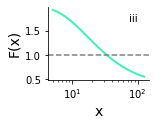

$b_x=1.00$
[2.5e-02 2.5e-02 1.0e+00 1.0e+00 1.0e-02 1.0e-02 1.0e+02 1.0e+00 1.0e-02
 1.0e-02 4.0e+03 4.0e+01 2.5e-02 2.5e-02 4.0e+01 4.0e+01 1.0e-02 2.5e-01
 5.0e-01 2.5e-01 1.0e-02 2.5e-03 5.0e-01 2.5e-03 1.0e+00 1.0e+00 1.0e+00
 1.0e+00]
expr0 0.0004805382027871216


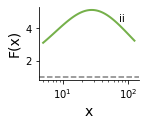

$b_x=5.00$
[2.5e-02 2.5e-02 5.0e+00 5.0e+00 1.0e-02 1.0e-02 1.0e+02 1.0e+00 1.0e-02
 1.0e-02 4.0e+03 4.0e+01 2.5e-02 2.5e-02 2.0e+02 2.0e+02 1.0e-02 2.5e-01
 5.0e-01 2.5e-01 1.0e-02 2.5e-03 5.0e-01 2.5e-03 1.0e+00 1.0e+00 1.0e+00
 1.0e+00]
expr0 0.0004805382027871215


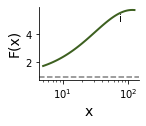

In [11]:
text_labels=["iii","ii","i"]
for b_,bx in enumerate(bxlist):
    pars=np.array([ax,bx,aP_0_0,bP_P_0,kopen0,kclose0,alpha,beta,gamma,w,kbx])
    #title=r"$\alpha=%2.2f,\omega=%2.2f,b_x=%2.2f$"%(alpha,w,bG)
    title=r"$b_x=%2.2f$"%(bx)
    print(title)
    plot_parset(pars,qs,title=None,color=colors_bx[b_],text=text_labels[b_],figname=os.path.join(figsfolder,"fig3C_panel%s.svg"%text_labels[b_]),xrange=xlplot)
    #plot_parset(pars,qs,title=title,color=colors_bx[b_],text=text_labels[b_],figname=None)


$x$=$0.50$


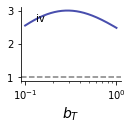

$x$=$2.00$


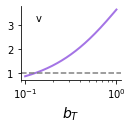

In [12]:
#now as a function of bx

pars=np.array([ax,bx,aP_0_0,bP_P_0,kopen0,kclose0,alpha,beta,gamma,w,kbx])
text_labels=["iv","v"]
colors_lines=["#484eadff","#a474e5ff"]
for x_,x in enumerate(xlist):
    title=r"$x$=$%2.2f$"%(x)
    print(title)
    plot_parset_bx(pars,qs,10**x,title=None,text=text_labels[x_],color=colors_lines[x_],bTrange=bTlplot,figname=os.path.join(figsfolder,"fig3C_panel%s.svg"%text_labels[x_]))
    #plot_parset_bx(pars,qs,x,title=title,text=text_labels[x_],color=colors_lines[x_],figname=None)


In [65]:
np.log10(0.0075)

-2.1249387366083

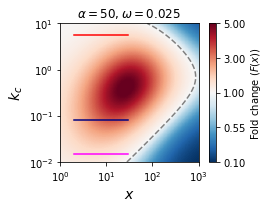

[2.50000000e-02 2.50000000e-02 7.50000000e-01 7.50000000e-01
 1.00000000e-02 1.00000000e-02 1.00000000e+02 1.00000000e+00
 1.00000000e-02 1.00000000e-02 4.00000000e+03 4.00000000e+01
 2.50000000e-02 2.50000000e-02 3.00000000e+01 3.00000000e+01
 1.00000000e-02 5.62341325e+00 5.00000000e-01 5.62341325e+00
 1.00000000e-02 5.62341325e-02 5.00000000e-01 5.62341325e-02
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00]
expr0 0.00011755989323011293


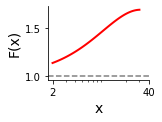

[2.50000000e-02 2.50000000e-02 7.50000000e-01 7.50000000e-01
 1.00000000e-02 1.00000000e-02 1.00000000e+02 1.00000000e+00
 1.00000000e-02 1.00000000e-02 4.00000000e+03 4.00000000e+01
 2.50000000e-02 2.50000000e-02 3.00000000e+01 3.00000000e+01
 1.00000000e-02 7.94328235e-02 5.00000000e-01 7.94328235e-02
 1.00000000e-02 7.94328235e-04 5.00000000e-01 7.94328235e-04
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00]
expr0 0.0012055210856398663


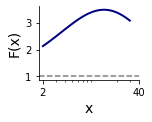

[2.5e-02 2.5e-02 7.5e-01 7.5e-01 1.0e-02 1.0e-02 1.0e+02 1.0e+00 1.0e-02
 1.0e-02 4.0e+03 4.0e+01 2.5e-02 2.5e-02 3.0e+01 3.0e+01 1.0e-02 1.5e-02
 5.0e-01 1.5e-02 1.0e-02 1.5e-04 5.0e-01 1.5e-04 1.0e+00 1.0e+00 1.0e+00
 1.0e+00]
expr0 0.004043583052805609


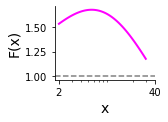

In [72]:
#Fig S2C
#as a function of kclose
bx=0.75 #increasing bx moves the maximum in the middle region towards the right
xvals=np.logspace(0,3,100)
kclosevals=np.logspace(np.log10(0.01),np.log10(10),100)

out=np.zeros((len(kclosevals), len(xvals)))

for k, kclose0 in enumerate(kclosevals):
    pars=np.array([ax,bx,aP_0_0,bP_P_0,kopen0,kclose0,alpha,beta,gamma,w,kbx])

    xval=0
    parset=getparset(pars)
    parset=np.concatenate((parset,qs))
    instance.fill_num_den(parset,othervars)
    expr0=instance.interfaceGRF(xval)

    for x_,xval in enumerate(xvals):
        expr=instance.interfaceGRF(xval)
        out[k,x_]=expr/expr0

kcloselist=[10**0.75,10**(-1.1),0.015]
xlplot=[np.log10(2),np.log10(30)]
xticks=[2,40]
fig,axplt=plt.subplots(1,1,figsize=(4,3)) 
#ar=np.ma.masked_array(out,mask=out<1)
min_val_rounded=np.round(out.min(),1) #round minimum value to 1 decimal
max_val_rounded=np.round(out.max(),0) #round max value to 0 decimals
norm=colors.TwoSlopeNorm(vmin=min_val_rounded, vcenter=1., vmax=max_val_rounded)
extent=[np.log10(xvals[0]),np.log10(xvals[-1]),np.log10(kclosevals[0]),np.log10(kclosevals[-1])]
im=axplt.imshow(out,origin="lower",norm=norm,cmap=plt.cm.RdBu_r,extent=extent)
axplt.contour(out,extent=extent,levels=[1],linestyles=["--"],colors=["gray"])
colors_kc=["red","navy","magenta"]
for k_,kc in enumerate(kcloselist):
#    print(kc)
    axplt.plot(xlplot,[np.log10(kc),np.log10(kc)],linestyle="-",color=colors_kc[k_])

    #ax.axhline(y=np.log10(bG),)
#ax.set_xscale('log')
axplt.set_ylabel(r"$k_c$",size=14)
axplt.set_xlabel(r"$x$",size=14)
axplt.set_title(r"$\alpha=%g,\omega=%g$"%(alpha,w))
axplt.set_xticks([0,1,2,3])
axplt.set_xticklabels([r"$10^0$",r"$10^1$",r"$10^2$",r"$10^3$"])
axplt.set_yticks([-2,-1,0,1])
axplt.set_yticklabels([r"$10^{-2}$",r"$10^{-1}$",r"$10^0$",r"$10^1$"])
below_one=np.linspace(min_val_rounded,1,3)
above_one=np.linspace(1,max_val_rounded,3)
bounds=np.concatenate((below_one,above_one[1:]))
plt.colorbar(im,label="Fold change ($F(x)$)",ax=axplt,ticks=bounds)
#ax.axhline(y=1,linestyle="--",color="gray")
#if title is not None:
#    ax.set_title(title)
plt.savefig(os.path.join(figsfolder,"figS2Acmap.svg"))
plt.tight_layout()
plt.show()
for k_,k_close_ in enumerate(kcloselist):
    pars=np.array([ax,bx,aP_0_0,bP_P_0,kopen0,k_close_,alpha,beta,gamma,w,kbx])
    title=r"$k_c=%2.3f$"%(k_close_)
    plot_parset(pars,qs,title=None,color=colors_kc[k_],figname=os.path.join(figsfolder,"figS2A_%d.svg"%k_),xrange=xlplot,xticks=xticks)
    #plot_parset(pars,qs,title=title,color=colors_kc[k_],figname=None)